In [1]:
#Titanic Data 

In [2]:
import pandas as pd
import numpy as np 

df = pd.read_csv('https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch12/titanic/train.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 표준화 할 지말지 결정하기 

In [5]:
df['Survived'].value_counts()
# 사망 - 61.6 % 
# 생존 - 38.4 %

0    549
1    342
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026023CB6E10>,
      dtype=object)

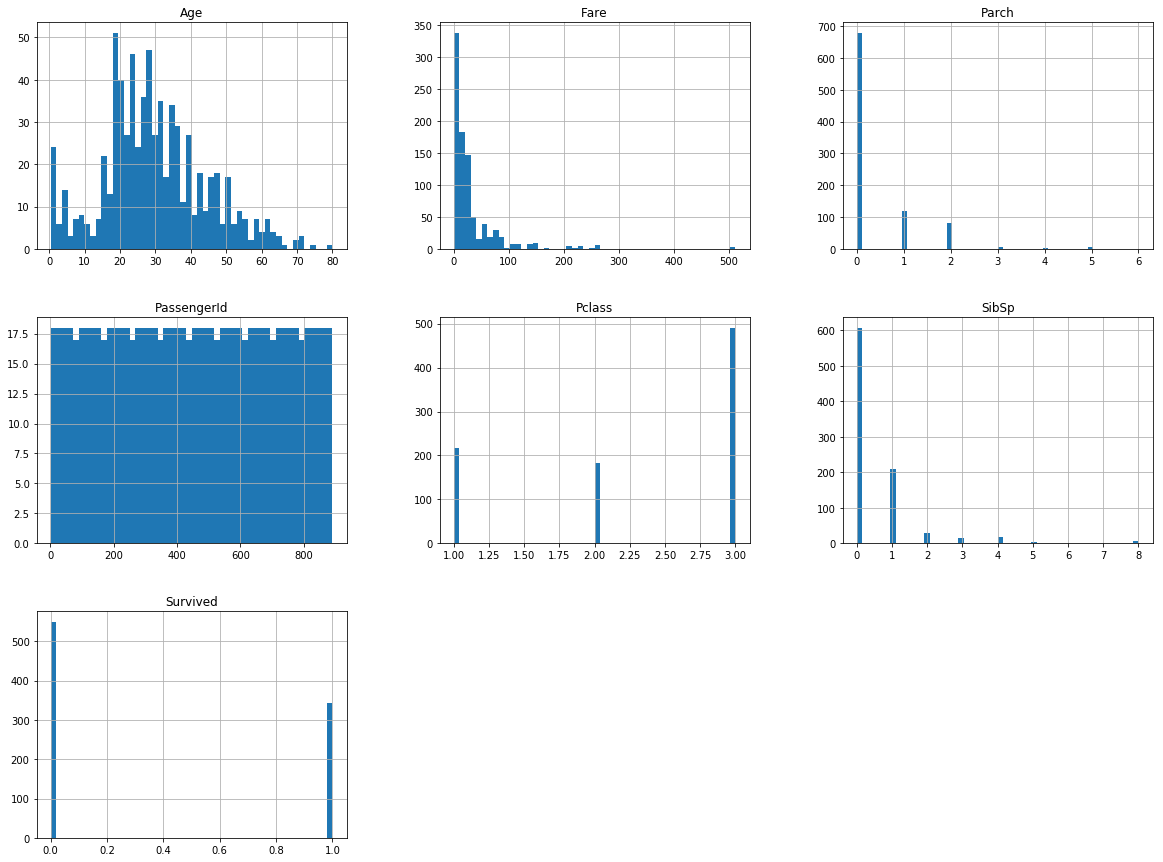

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins = 50, figsize = (20,15))

# SibSp (배우자나 형제 자매의 수) 
# Parch (부모나 자식의 수)
# 탑승자들의 나이는 10대 후반 부터 20대 후반까지 가장 많은 분포를 지닌다
# 1등석에 탄 사람이 2등석에 탄 사람 보다 많기 때문에 1등석에 탄 사람이 많이 산다고 하더라도 클래스별 비교를 해 봐야한다.

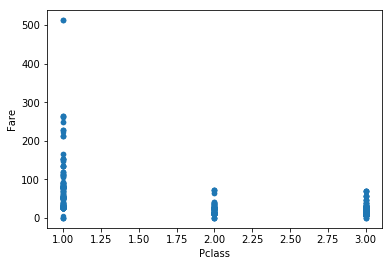

In [7]:
df.plot(kind = 'scatter', x = 'Pclass', y = 'Fare')
# 요금에 따라 class가 결정되는 것은 또 아니다.

In [8]:
df.info()

# age 값 - 177개의 null 값 - 평균으로 채우기 
# Cabin 값 - 687개의 null 값 - 너무 많은 Null 값과 text값이 영향을 미치는지 여부를 확인하기 어렵기 때문에 삭제하는게 나을거라 생각
# Embarked 값 - 2개의 null 값 - 제일 적은 값으로 채우기 
# PassengerId - 고유값을 가지고 있지만, 분석하는데 도움이 되어 보이진 않으므로 지우기 

del df['Cabin']
del df['PassengerId']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean()) # Age 값의 Null값은 평균으로 채운다 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [11]:
#Name 과 Ticket도 도움이 되어 보이지 않음.. 그리고 Embarked 의 범주형 특성을 숫자로 바꿔줄 필요가 있음

del df['Name']
del df['Ticket']

In [12]:
df['Sex']=df['Sex'].replace(['female','male'],[0,1])

In [13]:
df['Embarked']=df['Embarked'].replace(['S','C','Q'],[0,1,2])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [14]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts().index[2])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [15]:
x_data = df.iloc[:,1:]
y_data = df.iloc[:,0]

x_data = x_data.values
y_data = y_data.values

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 42)

In [17]:
x_train.shape, y_train.shape

((623, 7), (623,))

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
from sklearn.metrics import precision_score, recall_score

tree_train_prediction = tree_clf.predict(x_train)

tree_precision_score = precision_score(tree_train_prediction, y_train)
tree_recall_score = recall_score(tree_train_prediction, y_train)

print('Precision Score:', tree_precision_score)
print('Recall Score:', tree_recall_score)

Precision Score: 0.9523809523809523
Recall Score: 0.995475113122172


In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict


y_scores = cross_val_predict(tree_clf, x_train, y_train, cv=10)

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


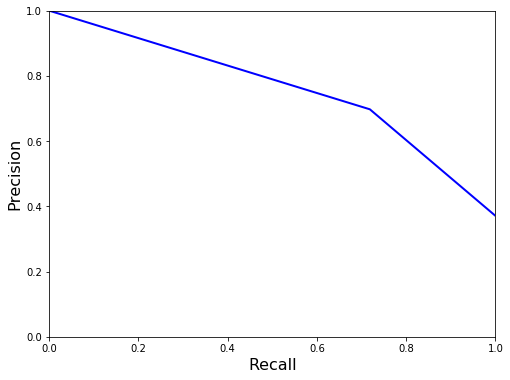

In [21]:
from sklearn.metrics import precision_recall_curve

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)


In [22]:
# Precision : 양성 예측의 정확도 (진짜 양성 / 진짜 양성 + 거짓 양성)
# Recall : 분류기가 정확하게 감지한 양성 샘플의 비율 (진짜 양성 / 진짜 양성 + 거짓 음성)

# Precision이 높아지면 Recall 값이 낮아지고 Recall 값이 높아지면 Precision 값이 낮아지는 상황에서 임계점을 찾는 것이 중요하다. 
# 이 그래프에서 볼 때 Recall 값이 0.7 이후로 Precision이 확연히 줄어드는 모습이 보이기 때문에 Recall 값을 0.7이하로 설정하는 것이 좋다.

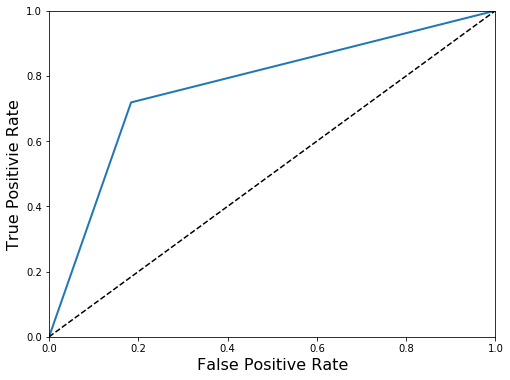

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positivie Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

# Recall 값과 Precision 값은 괜찮지만 ROC 값이 매우 낮은 걸 볼 수 있다. 
# 거짓 양성 비율에 대한 진짜 양성비율을 나타내는 지표가 낮다는 것은 이중분류에서 좋지 않다고 볼 수 있다. 다른 모델을 시도 

0.7674706246134817

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

forest_clf.fit(x_train, y_train)

C:\Users\cnsdl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
forest_train_prediction = forest_clf.predict(x_train)

y_scores2 = cross_val_predict(forest_clf, x_train, y_train, cv=10)

roc_auc_score(y_train, y_scores2)

0.7704468150896724

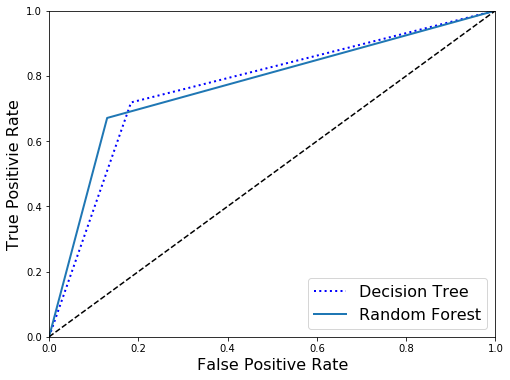

In [27]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [28]:
forest_precision_score = precision_score(forest_train_prediction, y_train)
forest_recall_score = recall_score(forest_train_prediction, y_train)

print('Forest Precision Score:', forest_precision_score)
print('Tree Precision Score:', tree_precision_score)

print('Forest Recall Score:', forest_recall_score)
print('Tree Recall Score:', tree_recall_score)

print('Forest AUC:', roc_auc_score(y_train, y_scores2))
print('DecisionTree AUC:', roc_auc_score(y_train, y_scores))

# Precision 값과 Recall 값은 Decision Tree 값이 높지만 AUC값은 Random Forest 가 더 높은 것을 볼 수 있다.

Forest Precision Score: 0.9177489177489178
Tree Precision Score: 0.9523809523809523
Forest Recall Score: 0.9814814814814815
Tree Recall Score: 0.995475113122172
Forest AUC: 0.7704468150896724
DecisionTree AUC: 0.7674706246134817


In [29]:
# Train set의 크기가 작기 때문에 K-Fold Cross-validation을 실행하여 교차검증을 시행

In [30]:
from sklearn.model_selection import cross_val_score

tree_cross_score = cross_val_score(tree_clf, x_train, y_train, cv = 10, scoring = 'roc_auc')
forest_cross_score = cross_val_score(forest_clf, x_train, y_train, cv = 10, scoring = 'roc_auc')

print('Tree:', tree_cross_score.mean())
print('Forest:', forest_cross_score.mean())

# Accuracy Mean
# Tree: 0.7850358422939068
# Forest: 0.7963765681003584

# Recall Mean 
# Tree: 0.7186594202898552
# Forest: 0.6715579710144928

# Roc Auc Mean
# Tree: 0.7601390050167224
# Forest: 0.8184695512820512

# Accurcay 와 AUC값이 높은 Forest를 최종 모델로 선택하여 세뷰 튜닝을 진행

Tree: 0.7589200111482721
Forest: 0.8184695512820512


In [31]:
# 둘 다 값이 낮은 Recall 값을 기준으로 돌림
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 30], 'max_features': [1,3,5,7]},
    {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [2, 3, 5,7]},
  ]


grid_search = GridSearchCV(forest_clf, param_grid, cv = 5, scoring = 'recall', return_train_score = True)

grid_search.fit(x_train, y_train)

C:\Users\cnsdl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 30], 'max_features': [1, 3, 5, 7]}, {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [2, 3, 5, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [32]:
print(grid_search.best_params_)

{'max_features': 5, 'n_estimators': 10}


In [33]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
final_model = grid_search.best_estimator_

x_train_final = final_model.fit(x_train, y_train)

print(precision_score(forest_train_prediction, y_train))
print(recall_score(forest_train_prediction, y_train))

0.9177489177489178
0.9814814814814815


In [35]:
final_prediction = final_model.predict(x_test)

final_y_scores = cross_val_predict(final_model, x_test, y_test, cv=10)

forest_precision_score = precision_score(final_prediction, y_test)
forest_recall_score = recall_score(final_prediction, y_test)
forest_auc_score = roc_auc_score(y_test, final_y_scores)

print(forest_precision_score) #0.7117117117117117
print(forest_recall_score) #0.7669902912621359
print(forest_auc_score) #0.7801973948470764

# AUC 점수는 test 점수에서 1점이 올랐지만 precision 값이나 recall 값은 20점이 넘게 차이가 나는 것을 볼 수 있다.

0.7117117117117117
0.7669902912621359
0.7801973948470764


In [36]:
# Decision Tree 이후에 Random Forest로 모델을 선택하여 K-fold 교차검증, grid search를 통해 성능을 올리려고 했지만 70% 수준의
# 성능 밖에 보여주지 못 하고 있다. final model을 수립 후 train set에서 했을 땐 91%의 정확도와 98%의 재현율을 보이는 것으로 보아
# 과적합되지 않았나 생각된다. 총 데이터 셋이 1000개 밖에 되지 않기 때문에 과대적합을 해결하기 위해 더 많은 수의 데이터를 수집하거나
# 파라미터 수가 적은 모델을 선택하여 제약이 필요해 보인다.